# Convolution Neural Networks (CNNs)

## Advantages

- Used in image classification: facial recognition, satellite analysis, optical character recognition, sound analysis through audiograms, image tagging, anomaly detection in video images.
- Can use large, full-color images.
- CNNs preserve **locality** of pixels in an image (all the pixels in a small vicinity have relationships with each other).
- CNNs reduces the connections so we can go deeper: done through shared weights used by **filters** (aka **kernels**).
- **Transfer learning** can be used to extend a model to new image classification with small amount of retraining.

## Disadvantages.

- Sames as general neural network disadvantages.

## References

1. Hands-On Machine Learning, Chapter 14, 15.
1. Fundamentals of Deep Learning, Chapter 5.
1. Deep Learning, Chapter 9.
1. A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way: [https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
1. Wikipedia: Convolutional Neural Network: [https://en.wikipedia.org/wiki/Convolutional_neural_network](https://en.wikipedia.org/wiki/Convolutional_neural_network)
1. StatQuest: Convolutional Neural Networks: [https://www.youtube.com/watch?v=HGwBXDKFk9I](https://www.youtube.com/watch?v=HGwBXDKFk9I)

# Convolutional Layers

## Filters

A **convolutional layer** takes a subsample of a matrix by applying a **filter** or **kernel**. The filter is commonly a 3x3, 5x5, or 7x7 grid. The filter is overlayed onto the full matrix the dot product is made. A bias is then added.

Output of a neuron in a convolution layer,

$$
    z_{i,j,k} = b_k + \sum_{u=0}^{f_h-1} \sum_{v=0}^{f_w-1} \sum_{k^\prime=0}^{f_{n^\prime -1}} x_{i^\prime,j^\prime,k^\prime} \cdot w_{u,v,k^\prime,k} \text{ with } \begin{cases} i^\prime = i \times s_h + u \\ j^\prime = j \times s_w + v\end{cases}
$$

- $z_{i,j,k}$ is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer $l$.
- $s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ are the height and width of the receptive field, and $f_{n^\prime}$ is the number of feature mapts in the previous layer (layer $l - 1$).
- $x_{i^\prime,j^\prime,k^\prime}$ is the output of the neuron located in layer $l – 1$, row $i^\prime$, column $j^\prime$, feature map $k^\prime$ (or channel $k^\prime$ if the previous layer is the input layer).
- $b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness of the feature map $k$.
- $w_u,v,k^\prime,k$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron’s receptive field), and feature map $k^\prime$.

### Stride

**Stride** 

### Padding

**Padding** 

## Feature Map

A **feature map** is the composition of all filter dot products over the entire matrix. The feature map is then run through a ReLU activation function.

## Pooling Layers

**Max pooling** uses a new filter on the feature map and selects the region(s) with the highest possible values. In other words, max pooling identifies which mapped features most closely matched the input.

### Average Pooling

Alternatively, **mean pooling** calculates the average for each region.

### Depthwise Pooling

### Global Average Pooling

## Neural Network

The pooled feature map become the inputs for a classification neural network.

In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [4]:
# Class labels for the Fashion MNIST dataset.
# https://keras.io/api/datasets/fashion_mnist/
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [5]:
img_list = []
for lbl in np.unique(y_train):
    for img in X_train[y_train == lbl][:5]:
        img_list.append((lbl, img))

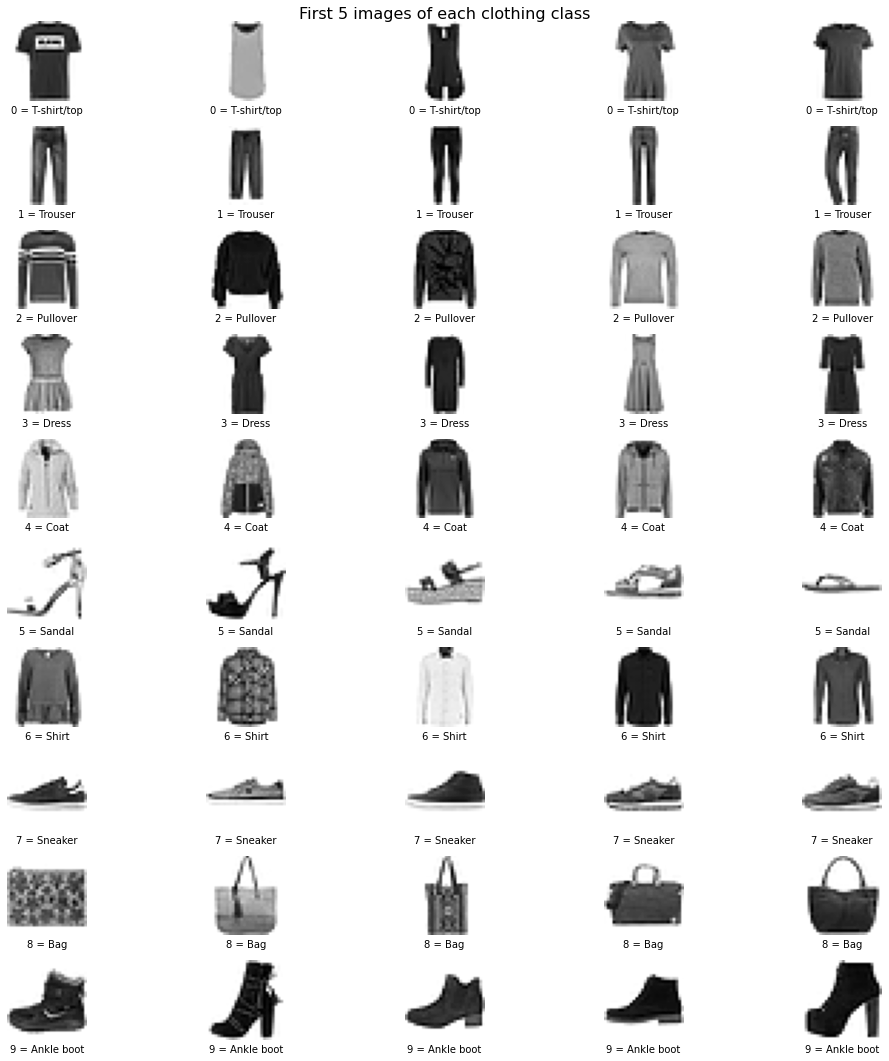

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15,15), facecolor='white')
for i, ax in enumerate(axes.flat):
    lbl = img_list[i][0]
    img = img_list[i][1]
    ax.imshow(img, cmap=plt.cm.binary)
    ax.set_xlabel(f'{lbl} = {labels[lbl]}') # Class label
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(None)
    sns.despine(left=True, bottom=True)
fig.suptitle('First 5 images of each clothing class', fontsize=16)
fig.tight_layout()
plt.show()

## Convolutional Neural Network Example

In [7]:
cnn = keras.models.Sequential(
    [
        keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
        keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ]
)

In [8]:
cnn.compile(
    optimizer=keras.optimizers.Adam(), 
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[keras.metrics.sparse_categorical_accuracy]
)

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [10]:
import datetime as dt

In [11]:
earlystop_cb = keras.callbacks.EarlyStopping()
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    filepath='./data/cnn.ep_{epoch:02d}val_{val_loss:.2f}.h5'
)

In [12]:
history = cnn.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_data=(X_valid, y_valid),
    callbacks=[earlystop_cb, checkpoint_cb],
    workers=8,
    use_multiprocessing=True
)

Epoch 1/50
1719/1719 [==============================] - 309s 179ms/step - loss: 1.1473 - sparse_categorical_accuracy: 0.5768 - val_loss: 0.3751 - val_sparse_categorical_accuracy: 0.8642
Epoch 2/50
1719/1719 [==============================] - 306s 178ms/step - loss: 0.4638 - sparse_categorical_accuracy: 0.8394 - val_loss: 0.3253 - val_sparse_categorical_accuracy: 0.8798
Epoch 3/50
1719/1719 [==============================] - 281s 163ms/step - loss: 0.3838 - sparse_categorical_accuracy: 0.8684 - val_loss: 0.3006 - val_sparse_categorical_accuracy: 0.8886
Epoch 4/50
1719/1719 [==============================] - 290s 169ms/step - loss: 0.3390 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.2764 - val_sparse_categorical_accuracy: 0.8978
Epoch 5/50
1719/1719 [==============================] - 236s 137ms/step - loss: 0.3143 - sparse_categorical_accuracy: 0.8904 - val_loss: 0.2796 - val_sparse_categorical_accuracy: 0.9010


In [13]:
y_pred = cnn.predict(X_test)

### Model Parameters

In [14]:
history.history

{'loss': [0.7822006940841675,
  0.44147124886512756,
  0.37297019362449646,
  0.33599910140037537,
  0.3094509243965149],
 'sparse_categorical_accuracy': [0.7176363468170166,
  0.8482000231742859,
  0.8720181584358215,
  0.8859272599220276,
  0.8920363783836365],
 'val_loss': [0.3751220703125,
  0.32531026005744934,
  0.3005542755126953,
  0.27644574642181396,
  0.27962130308151245],
 'val_sparse_categorical_accuracy': [0.8641999959945679,
  0.879800021648407,
  0.8885999917984009,
  0.8978000283241272,
  0.9010000228881836]}

### Model Saving and Loading

In [15]:
keras.models.save_model(cnn, filepath='./data/cnn.h5')
del cnn

In [16]:
cnn = keras.models.load_model(filepath='./data/cnn.h5')

### Evaluation

In [19]:
import shap